Largely taken from James Dawson at https://spacemeerkat.wordpress.com/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.spatial.distance import cdist
from random import shuffle

In [2]:
class GaussianProcess(object):

    def __init__(self,kernel_func,*args):
        """
            def __init__(self,kernel_func,*args):

            Define prior function for the kernel of the Gaussian Process.
                Minimum argument requirements:
                    1D x length N NumPy array : x
                    1D x length N NumPy array : y
                Optional arguments accessible through:
                    *self.args
        """
        self.kernel = kernel_func
        self.args = args
        
    def posterior(self,x_train,y_train,x_prior,samples=20,introduced_err=0.0):
        """
            def posterior(self,x_train,y_train,x_prior,samples=20,introduced_err=0.0):

            Gives posterior of Gaussian Process with previously instantiated kernel
                Minimum argument requirements:
                    1D x length N NumPy array : x_train
                    1D x length N NumPy array : y_train
                    1D x length N NumPy array : x_prior
                Optional arguments:
                    int number of processes to be sampled alongside plot, default 20
                    float error/noise to be introduced, default 0.0
        
        """
        #Pass everything into class wide variables
        self.x_train = x_train
        self.y_train = y_train
        self.x_prior = x_prior
        self.samples = samples
        self.introduced_err = introduced_err
  
        #Set up kernel matrices using prior kernel
        k_tt = self.kernel(x_train , x_train, *self.args)
        k_pp = self.kernel(x_prior , x_prior, *self.args)
        k_pt = self.kernel(x_prior , x_train, *self.args)
        k_tp = self.kernel(x_train , x_prior, *self.args) ## = k_tp transpose

        # Calculate the mean
        # X = x_train
        # x* = x_prior
        # Y = y_train
        # I = identity matrix
        # \sigma = introduced_err
        #
        ###    \mu =( k(x*,X).(k(X,X)+(\sigma**2)*I)**-1 ). Y   ###
        #
        #
        self.mean_function = np.dot(np.dot(k_pt ,np.linalg.inv(k_tt+((introduced_err**2)*np.eye(len(x_train))) )) , y_train)

        # Calculate Covariance
        #
        ###    COV = k(x*,x*) - (k(x*,X)**-1).((k(X,X)+(\sigma**2)*I)**-1)
        self.covariance_function = k_pp - np.dot(np.dot(k_pt ,np.linalg.inv(k_tt + ((introduced_err**2)*np.eye(len(x_train))))) , k_tp)

        # Calculate posterior
        ## Randomly sample:
        ##    N(\mu,COV)
        ## self.camples number of times
        self.post = np.random.multivariate_normal(self.mean_function[:,0],self.covariance_function , self.samples)

        # Calculate Standard deviation
        ## Gaussian process therefore SD is diag of covariance function
        self.std = np.diag(self.covariance_function)

    
    def plot(self,n_stds=2.):
        """
            def plot(self,n_stds=2.):

            Gives a standardised plot for the Gaussian process.
            Optional arguments:
                Float number of standard deviations to be shaded about mean, default 2.0
        
        """

        plt.figure()
        fig1 = plt.gcf()

        plt.plot(self.x_prior,self.post.T,'g-',alpha=0.1)

        plt.errorbar(self.x_train,self.y_train, yerr=self.introduced_err,color='k',fmt='o')

        plt.plot(self.x_prior , self.mean_function.flat, 'r-')
        plt.fill_between(x = self.x_prior.flatten() , y1 = self.mean_function.flatten() + (n_stds*self.std),
                        y2 = self.mean_function.flatten() - (n_stds*self.std), linestyle = '-.',alpha = 0.1)
        plt.xlim(min(self.x_prior),max(self.x_prior))

        plt.xlabel('x')
        plt.ylabel('f(x)')  
        strng = "Posterior Probability of"
        strng2 = f"Gaussian Process ML with {sigma:.2f} sigma noise"
        plt.title(strng + '\n' + strng2)
        plt.show()

In [3]:
def exp_kernel (x,y, *args):
	K = (args[0]**2) * np.exp((-0.5*(cdist(x,y)**2))/(args[1]**2))
	return K

In [4]:
x_prior = np.linspace(-10.0,20.0,500)
x_prior = x_prior.reshape(-1,1)

In [5]:
mu_data = np.zeros(x_prior.shape)
#mu_data += prior_mu

In [6]:
n_training_points = 25
n_training_points += 1
x_train = np.linspace(-10.,10.0,n_training_points)
shuffle(x_train)
x_train = x_train.reshape(-1,1)

y_train = list(map(lambda x: np.cos(x),x_train))#np.exp((-1.)*(x**2)),x_train))#x: x**3 + x**2 + x + 1.,x_train))

In [7]:
sigma = 0.5

In [8]:
gp = GaussianProcess(exp_kernel,1.,1.)

In [9]:
gp.posterior(x_train,y_train,x_prior)

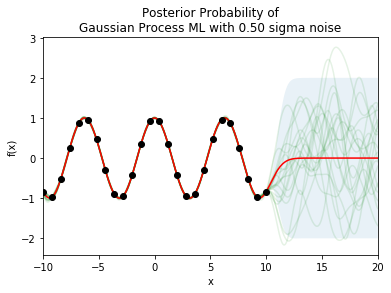

In [10]:
gp.plot()

In [ ]:
# def gaussian_process(kernel, mu, x, y, sigma, length_scale, samples):
#     f = np.random.multivariate_normal(mu.flatten(), kernel(x,y, sigma, length_scale), samples)
#     return f

In [ ]:
# n_samples = 5
# f = gaussian_process(exp_kernel, mu_data, x_prior, x_prior, sigma = 1.0, length_scale = 1.0, samples = n_samples)

In [ ]:
# fig1=plt.gcf()
# plt.plot(x_prior,f.T)
# plt.xlabel('x')
# plt.ylabel('f(x)')
# strng = '{0} functions sampled from Gaussian Process'.format(n_samples)
# plt.title(strng)
# strng = strng.split(" ")
# strng = "_".join(strng)
# print(strng)
# # fig1.savefig(savepath + strng + ".png")
# plt.show()

Now we have created our Gaussian Process, we have the possibility of accessing any function, centred in a gaussian about mu, with SD sigma, with each point in independent co-ordinate x being equally gaussian.

To show the trend of the GP with many samples:

In [ ]:
# f2 = gaussian_process(exp_kernel, mu_data, x_prior, x_prior, sigma = 1.0, length_scale = 1.0, samples = 2000)

# fig1=plt.gcf()
# plt.plot(x_prior,f2.T, alpha=0.01, color = 'blue')
# plt.xlabel('x')
# plt.ylabel('f(x)')
# strng = 'Gaussian Trend of many functions sampled from Gaussian Process'
# plt.title(strng)
# strng = strng.split(" ")
# strng = "_".join(strng)
# print(strng)
# # fig1.savefig(savepath + strng + ".png")
# plt.show()

Now to do some learning! =D

**p(y'|y) ~ N**( k(x',x) (k(x,x) + (sigma^2)I)^(-1) y **,** k(x',x') - k(x',x) (k + (sigma^2)I)^(-1) k(x,x).T)

In [ ]:
def posterior(x_train,y_train,x_prior,samples,introduced_err=0.0):

    k_tt = exp_kernel(x_train , x_train , 1.,1.)
    k_pp = exp_kernel(x_prior , x_prior , 1.,1.)
    k_pt = exp_kernel(x_prior , x_train , 1.,1.)
    k_tp = exp_kernel(x_train , x_prior , 1.,1.) ## = k_tp transpose

    mean_function = np.dot(np.dot(k_pt ,np.linalg.inv(k_tt+((introduced_err**2)*np.eye(len(x_train))) )) , y_train)

    covariance_function = k_pp - np.dot(np.dot(k_pt ,np.linalg.inv(k_tt + ((introduced_err**2)*np.eye(len(x_train))))) , k_tp)

    post = np.random.multivariate_normal(mean_function[:,0],covariance_function , samples)

    std = np.diag(covariance_function)

    return mean_function,covariance_function,post,std

In [ ]:
for data_point in range(1,n_training_points+1,5):
    mean_function,covariance_function,post,std = posterior(x_train[0:data_point] \
   ,y_train[0:data_point],x_prior,samples = 25, introduced_err= sigma)
    
    
    plt.figure(data_point)
    fig1 = plt.gcf()
    
    for i in range(len(post)):
        plt.plot(x_prior,post[i,:],'g-',alpha=0.1)

    plt.errorbar(x_train[0:data_point],y_train[0:data_point], yerr=sigma,color='k',fmt='o')

    plt.plot(x_prior , mean_function.flat, 'r-')
    plt.plot(x_prior , mean_function.flat + (2*std), 'b-.')
    plt.plot(x_prior , mean_function.flat - (2*std), 'b-.')
    plt.xlim(-10.,20.0)
    
#    y1 = mean_function[:,0] - (2*std)
#    y2 = mean_function[:,0] - (2*std)

    plt.xlabel('x')
    plt.ylabel('f(x)')  
    strng = f"""Posterior Probability after {data_point} data points"""
    strng2 = f"""Gaussian Process ML with {sigma} sigma noise"""
    plt.title(strng + '\n' + strng2)
    strng = strng + '_' + strng2
    strng = strng.split(" ")
    strng = "_".join(strng)
    print(strng)
#     fig1.savefig(savepath + strng + ".png")
    plt.show()


